## 1. Introduction
<p>Everyone loves Lego (unless you ever stepped on one). Did you know by the way that "Lego" was derived from the Danish phrase leg godt, which means "play well"? Unless you speak Danish, probably not. </p>
<p>In this project, we will analyze a fascinating dataset on every single lego block that has ever been built!</p>
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_10/datasets/lego-bricks.jpeg" alt="lego"></p>

## 2. Reading Data
<p>A comprehensive database of lego blocks is provided by <a href="https://rebrickable.com/downloads/">Rebrickable</a>. The data is available as csv files and the schema is shown below.</p>
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_10/datasets/downloads_schema.png" alt="schema"></p>
<p>Let us start by reading in the colors data to get a sense of the diversity of lego sets!</p>

In [1]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ingest data
colors = pd.read_csv('datasets/colors.csv', index_col='id')

# Display data
colors.head(10)

,name,rgb,is_trans
id,,,
-1,Unknown,0033B2,f
0,Black,05131D,f
1,Blue,0055BF,f
2,Green,237841,f
3,Dark Turquoise,008F9B,f
4,Red,C91A09,f
5,Dark Pink,C870A0,f
6,Brown,583927,f
7,Light Gray,9BA19D,f


So, it seems we have 3 columns on the `colors` dataset. Let's **evaluate the data structure**, to get more details:

In [2]:
colors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135 entries, -1 to 9999
Data columns (total 3 columns):
name        135 non-null object
rgb         135 non-null object
is_trans    135 non-null object
dtypes: object(3)
memory usage: 4.2+ KB


It appears that data is **well-structured** and **we don't have problems with missing data**. Furthermore, data types are compatible with each field they represent. So, let's move on to an exploratory analysis!

## 3. Exploring Colors
<p>Now that we have read the <code>colors</code> data, we can start exploring it! Let us start by understanding the number of colors available.</p>

**_How many distinct colors have LEGO used over the years?_**

In [3]:
num_colors = colors['name'].nunique()
num_colors

135

So, LEGO has used 135 colors. **_Are they really unique colors?_**

In [4]:
colors.nunique()

name        135
rgb         124
is_trans      2
dtype: int64

_Only in part_. Although there are 135 unique color names, there are only 124 unique RGB color codes. **_Which are the repeated_** `rgb` **_color codes?_**

In [5]:
# Return all groups of colors with the same 'rgb' value
colors[colors.duplicated('rgb', keep=False)].sort_values('rgb')

,name,rgb,is_trans
id,,,
133,Speckle Black-Gold,000000,f
132,Speckle Black-Silver,000000,f
75,Speckle Black-Copper,000000,f
0,Black,05131D,f
9999,[No Color],05131D,f
40,Trans-Black,635F52,t
32,Trans-Black IR Lens,635F52,t
129,Glitter Trans-Purple,A5A5CB,t
52,Trans-Purple,A5A5CB,t


_There is a lot of repeated_ `rgb`_codes_. It's possible to see that these codes usually represent variations of related colors, such as colors' _Glitter_ or _Transparent_ versions.<br/>

**_How do the used colors look like?_** Since we have their hexadecimal codes in the `rgb` field, we can see them!

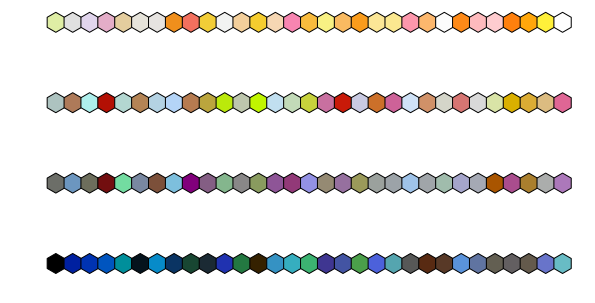

In [6]:
# Create (x,y) coordinates to plot colors
x_coord = list(range(31)) * 4
y_coord_t = [[x]*31 for x in range(1, 5)]
y_coord = [item for sublist in y_coord_t for item in sublist]

# Create a list of RGB Hex codes 
lego_colors = "#" + colors['rgb']
lego_colors = lego_colors.drop_duplicates().sort_values().to_list()

plt.rcParams['figure.figsize'] = [10, 5]
plt.scatter(x_coord, y_coord, s=400, marker='h', color=lego_colors, edgecolors='black')
plt.axis('Off')
plt.show()

## 4. Transparent Colors in Lego Sets
<p>The <code>colors</code> data has a column named <code>is_trans</code> that indicates whether a color is transparent or not. It would be interesting to explore the distribution of transparent vs. non-transparent colors.</p>

In [7]:
# Distribution of colors based on transparency
colors_summary = colors.groupby('is_trans')['name'].count().to_frame()
colors_summary

,name
is_trans,
f,107
t,28


So, there are 28 transparent colors, accounting for around **21% of all 135 colors** listed.

## 5. Explore Lego Sets
<p>Another interesting dataset available in this database is the <code>sets</code> data. It contains a comprehensive list of sets over the years and the number of parts that each of these sets contained. </p>
<p><img src="https://imgur.com/1k4PoXs.png" alt="sets_data"></p>
<p>Let us use this data to explore how the average number of parts in Lego sets has varied over the years.</p>

In [8]:
# Ingest data
sets = pd.read_csv('datasets/sets.csv', index_col="set_num")

# Display data
sets.head()

,name,year,theme_id,num_parts
set_num,,,,
00-1,Weetabix Castle,1970,414,471
0011-2,Town Mini-Figures,1978,84,12
0011-3,Castle 2 for 1 Bonus Offer,1987,199,2
0012-1,Space Mini-Figures,1979,143,12
0013-1,Space Mini-Figures,1979,143,12


Let's start by profiling the **data structure** of `sets`:

In [9]:
sets.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11866 entries, 00-1 to wwgp1-1
Data columns (total 4 columns):
name         11866 non-null object
year         11866 non-null int64
theme_id     11866 non-null int64
num_parts    11866 non-null int64
dtypes: int64(3), object(1)
memory usage: 463.5+ KB


Data seems **well-structured**: there aren't `null` values and the data type for each variable is compatible with the recorded information.<br/>

Let's move on to profile the **dataset scope** for each variable... Keeping in mind that we have 11,866 records in the dataset, **_how are distinct values distributed within each variable?_**

In [10]:
sets.nunique()

name         10543
year            66
theme_id       585
num_parts     1117
dtype: int64

Other than the `set_num` (used as the `DataFrame` index), **all variables present some repeated values**. Let's dig a little deeper on each variable, starting with `name`: **_how is the frequency distribution of set names?_**

In [11]:
name_counts = sets['name'].value_counts()
with pd.option_context('display.max_rows', 16):
    print(name_counts)

Basic Building Set                                   55
Universal Building Set                               32
Helicopter                                           23
Basic Set                                            23
Fire Station                                         14
Tow Truck                                            14
Fire Truck                                           13
Tractor                                              12
                                                     ..
Green Lizard                                          1
Freeze Ray Frenzy                                     1
Kabaya Basic 4-Pack                                   1
Forklift Transporter                                  1
Furry Creatures                                       1
City of Stiix                                         1
King Pharaoh the Third                                1
Electronic Control Unit (Forward/Backward - Stop)     1
Name: name, Length: 10543, dtype: int64


The most common set name was **Basic Building Set**, which appears **55 times** in the dataset. **_How common are sets with repeated names?_**

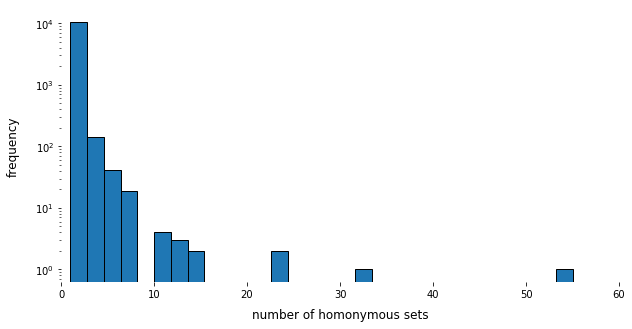

In [12]:
name_counts.plot(kind='hist', bins=30, edgecolor='black')
plt.xlim((0, 60))
plt.yscale('log')
plt.xlabel('number of homonymous sets', labelpad=10, fontsize='large')
plt.ylabel('frequency', labelpad=15, fontsize='large')
plt.box(False)
plt.show()

It is clear that the **vast majority of sets present unique (or very few) repeated names**. Names that are **shared by more than 10 sets are outliers**!<br/>

Let's proceed by profiling the `year` values to make sure our time series is complete:

In [13]:
# Display all distinct values for the 'year' variable
years = np.sort(sets['year'].unique())
print(years, "number of years: " + str(len(years)), sep='\n')

[1950 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965
 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979
 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993
 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007
 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017]
number of years: 66


_We have a problem here!_ We have 66 distinct `year` values, but the dataset covers 68 years. Values representing `1951` and `1952` are missing! We'll have to keep that in mind in future analyses!<br/>

For now, let's move on to the next variable, `theme_id`. **_How is the frequency distribution of theme IDs?_**

In [14]:
# Display the counts for each 'theme_id' value
with pd.option_context('display.max_rows', 20):
    print(sets['theme_id'].value_counts())

504    260
501    246
371    240
220    216
494    206
435    192
443    185
1      175
22     150
453    140
      ... 
515      1
607      1
444      1
523      1
608      1
531      1
595      1
150      1
25       1
44       1
Name: theme_id, Length: 585, dtype: int64


Some of the LEGO themes have **as many as 250 different sets**! **_Are there sets that share the same_** `theme_id` **_and the same_** `name`**_? Why is that?_**

In [15]:
# Display groups of sets that share the same 'name' and 'theme_id'
dup_sets = sets[sets.duplicated(subset=['name', 'theme_id'], keep=False)]
dup_sets.sort_values(['name', 'year']).head(10)

,name,year,theme_id,num_parts
set_num,,,,
1221-2,1 x 1 Bricks,1955,371,160
222-2,1 x 1 Bricks,1958,371,240
1222-2,1 x 1 Round Bricks,1955,371,200
223-2,1 x 1 Round Bricks,1958,371,160
1220-2,1 x 2 Bricks,1955,371,104
221-2,1 x 2 Bricks,1958,371,156
421-1,1 x 2 Bricks,1966,371,176
1224A-1,1 x 6 and 1 x 8 Bricks,1955,371,36
225-1,1 x 6 and 1 x 8 Bricks,1958,371,54


_Yes, there are sets with the same name and theme!_ Apparently, **sets can share the same** `name` **and** `theme`, but in that case these sets were usually **released in different years**.<br/>

Let's move on to the number of parts in each LEGO set, `num_parts`:

In [16]:
sets['num_parts'].describe()

count    11866.000000
mean       165.144783
std        336.382317
min         -1.000000
25%         10.250000
50%         46.000000
75%        174.000000
max       5922.000000
Name: num_parts, dtype: float64

Again, _we have something odd here_. We have sets with `-1` parts, which is a value that doesn't make much sense. Let's see more information about these records, and also if there are sets with `0` parts, which would also be odd:

In [17]:
sets[sets['num_parts'].isin([-1, 0])].sort_values('num_parts')

,name,year,theme_id,num_parts
set_num,,,,
Vancouver-1,"LEGO Store Grand Opening Exclusive Set, Oakrid...",2012,408,-1
240-1,"Wooden Storage Box Large, Empty",1967,383,-1
66392-1,"Duplo Cars Super Pack 3 in 1 (5816, 5817, 5818)",2012,506,-1
10623-1,Basic Bricks – Large,2015,505,0
851687-1,Robin Key Chain,2007,503,0
851659-1,Boba Fett Keyring,2008,503,0
851502-1,Ice Brick Tray - Yellow,2007,501,0
851464-1,Chewbacca Key Chain,2007,503,0
851463-1,Clone Trooper Key Chain,2007,503,0


**Only 3 values have** `-1` **parts**... Most likely, this value represents `null` values in the dataset. Surprisingly, **468 sets have 0 parts**! **_What do these values mean?_** Well, looking at the set names, it appears that sets with `num_parts = 0` represents **other types of LEGO merchandise**, such as _watches_, _flashlights_, _video game cartridges_, etc. Again, this is something unexpected... We'll probably have to keep it in mind in future analyses.<br/>

So far, we were profiling the `sets` dataset to evaluate its characteristics and value... But what about insights? What does this dataset tell us about LEGO sets? Let's answer some basic questions: **_Has LEGO increased the number of sets it releases each year?_**

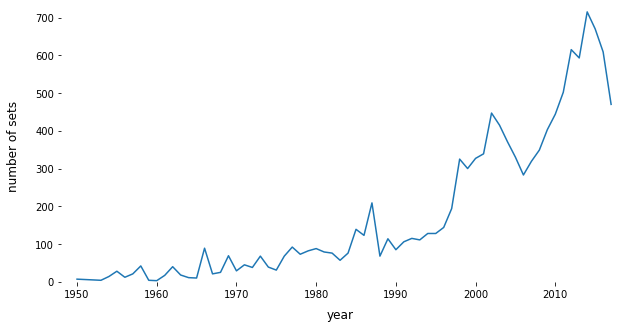

In [18]:
# Create a summary of the number of sets released each year: 'num_sets'
num_sets = sets.groupby('year')['name'].count()
num_sets.plot()
plt.xlim((1948, 2018))
plt.ylim((0, 720))
plt.xlabel('year', labelpad=10, fontsize='large')
plt.ylabel('number of sets', labelpad=15, fontsize='large')
plt.box(False)
plt.show()

_Yes, it has!_ Over the years, **the number of LEGO sets has been increasing**, especially after the mid-1990's. What about the sets themselves... **_Are LEGO sets getting bigger and more complex?_**

In [19]:
# Create a summary of average number of parts by year: `parts_by_year`
parts_by_year = sets.groupby('year')['num_parts'].mean().round(2).to_frame()
parts_by_year.head()

,num_parts
year,
1950,10.14
1953,16.50
1954,12.36
1955,36.86
1956,18.50


In [20]:
parts_by_year.tail()

,num_parts
year,
2013,181.36
2014,169.32
2015,200.22
2016,248.95
2017,300.12


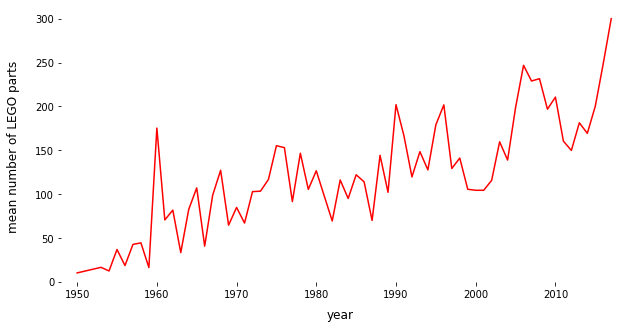

In [21]:
# Plot trends in average number of parts by year
parts_by_year.plot(legend=False, color='red')
plt.xlim((1948, 2018))
plt.ylim((0, 310))
plt.xlabel('year', labelpad=10, fontsize = 'large')
plt.ylabel('mean number of LEGO parts', labelpad=15, fontsize = 'large')
plt.box(False)
plt.show()

_Yes, LEGO sets have been getting bigger!_ There is an overall trend of **increasing the number os pieces** in LEGO sets each year, although the increase is not constant over time... But wait! Remember that a lot of sets are **non-traditional** LEGO sets... They represent other types of merchandise, such as _watches_ and _games_. If we remove sets with `-1` or `0` parts, **_is the size pattern the same?_**

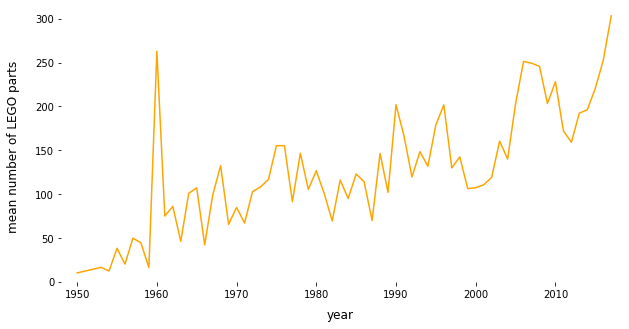

In [22]:
# Plot trends in average number of parts by year (not considering sets with 'num_parts' in (-1, 0))
sets_filtered = sets[sets['num_parts'] != 0]
parts_by_year_filtered = sets_filtered.groupby('year')['num_parts'].mean().round(2)
parts_by_year_filtered.plot(legend=False, color='orange')
plt.xlim((1948, 2018))
plt.ylim((0, 310))
plt.xlabel('year', labelpad=10, fontsize='large')
plt.ylabel('mean number of LEGO parts', labelpad=15, fontsize='large')
plt.box(False)
plt.show()

_Yes, the pattern is very similar!_ What about these sets with `0` parts? **_How was their production over time?_**

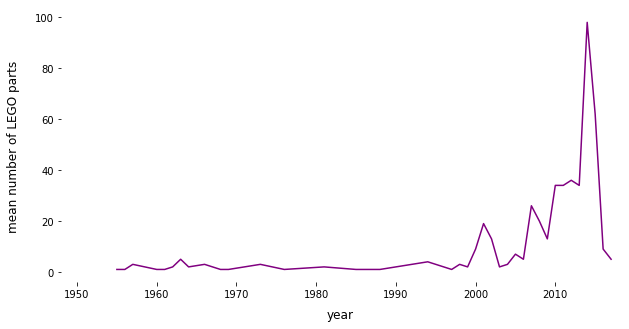

In [23]:
# Plot trends in the number of sets with 'num_parts' == 0
other_merch = sets[sets['num_parts'] == 0]
other_merch_by_year = other_merch.groupby('year')['num_parts'].count()
other_merch_by_year.plot(legend=False, color='purple')
plt.xlim((1948, 2018))
plt.xlabel('year', labelpad=10, fontsize='large')
plt.ylabel('mean number of LEGO parts', labelpad=15, fontsize='large')
plt.box(False)
plt.show()

_That's interesting!_ It appears that these non-traditional LEGO sets started to become consistently **more common after the year** `2000`, with a huge peak in `2014`.<br/>

So, we have already seem that LEGO sets became more varied over the years, and also more complex. **_But what about LEGO themes?_**

## 6. Lego Themes Over Years
<p>Lego blocks ship under multiple <a href="https://shop.lego.com/en-US/Themes">themes</a>. Let us try to get a sense of how the number of themes shipped has varied over the years.</p>

In [24]:
# themes_by_year: Number of themes shipped by year
themes_by_year = sets.groupby('year')['theme_id'].nunique().to_frame()
themes_by_year.head(8)

,theme_id
year,
1950,2
1953,1
1954,2
1955,4
1956,3
1957,4
1958,3
1959,3


**_Have LEGO themes become more abundant over the years?_**

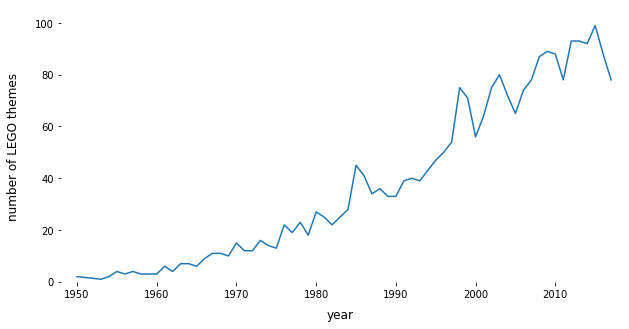

In [25]:
themes_by_year.plot(legend=False)
plt.xlim((1948, 2018))
plt.ylim((0, 105))
plt.xlabel('year', labelpad=10, fontsize='large')
plt.ylabel('number of LEGO themes', labelpad=15, fontsize='large')
plt.box(False)
plt.show()
plt.close()

_Yes, they have!_ There has been a trend of **constant increase in the number of LEGO themes**!

## 7. Wrapping It All Up!
<p>Lego blocks offer an unlimited amount of fun across ages. We explored some interesting trends around colors, parts, and themes. </p>

In [26]:
# Nothing to do here